За оваа лабораториска вежба одбрав податочно множество со податоци за разни покемони. Таргет колона ќе ми биде колоната "Legendary", која има 2 вредности(True и False) и во која се предвидува дали одреден покемон е легендарен или не.

линк до податочно множество : https://www.kaggle.com/datasets/abcsds/pokemon

Борјан Обедниковски 203106

In [415]:
import pandas as pd


In [416]:
!gdown 1yaG-Lq7QwjGLHhANBLb9x47e9pWVVLL4

Downloading...
From: https://drive.google.com/uc?id=1yaG-Lq7QwjGLHhANBLb9x47e9pWVVLL4
To: /content/Pokemon.csv
100% 44.0k/44.0k [00:00<00:00, 35.4MB/s]


In [417]:
dataframe = pd.read_csv("Pokemon.csv")

In [418]:
dataframe

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Проверка дали имаме missing values во податоците


In [419]:
import math 

In [420]:
dataframe.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Податоците од Legendary колоната се енкодираат со 1 доколку имаат вредност True и 0 доколку се False

In [421]:
# for i in range(799):
#     if(dataframe["Legendary"][i] == False):
#       dataframe["Legendary"][i] = 0
#     else:
#       dataframe["Legendary"][i] = 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [422]:
dataframe['Legendary'] = le.fit_transform(dataframe["Legendary"])

Missing values во колоната Type 2 се поставуваат на 'No second type' бидејки таквите покемони немаат втор тип и подари тоа оваа колона има празни полиња

In [423]:
for i in range(799):
    if(pd.isna(dataframe["Type 2"][i])):
      dataframe["Type 2"][i] = "No Second Type"

<ipython-input-423-378d690fe9c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["Type 2"][i] = "No Second Type"


In [424]:
dataframe.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [425]:
dataframe['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

In [426]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon'),
  Text(15, 0, 'Dark'),
  Text(16, 0, 'Steel'),
  Text(17, 0, 'Flying')])

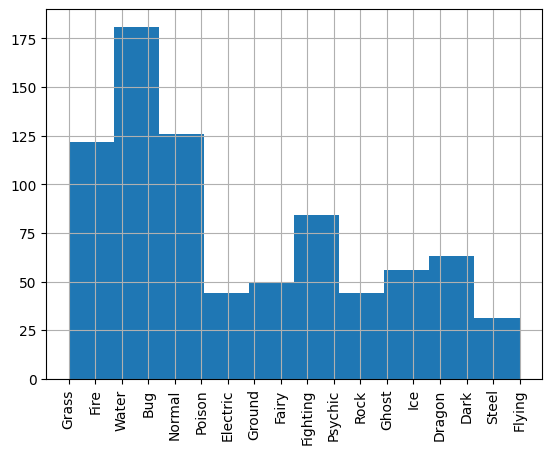

In [427]:
dataframe['Type 1'].hist()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Poison'),
  Text(1, 0, 'No Second Type'),
  Text(2, 0, 'Flying'),
  Text(3, 0, 'Dragon'),
  Text(4, 0, 'Ground'),
  Text(5, 0, 'Fairy'),
  Text(6, 0, 'Grass'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Psychic'),
  Text(9, 0, 'Steel'),
  Text(10, 0, 'Ice'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Dark'),
  Text(13, 0, 'Water'),
  Text(14, 0, 'Electric'),
  Text(15, 0, 'Fire'),
  Text(16, 0, 'Ghost'),
  Text(17, 0, 'Bug'),
  Text(18, 0, 'Normal')])

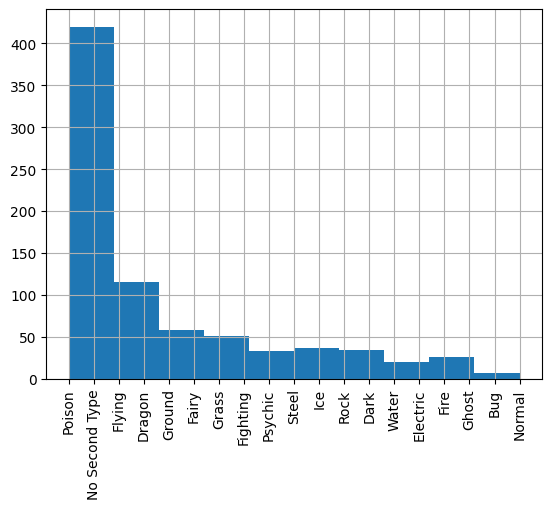

In [428]:
dataframe['Type 2'].hist()
plt.xticks(rotation=90)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

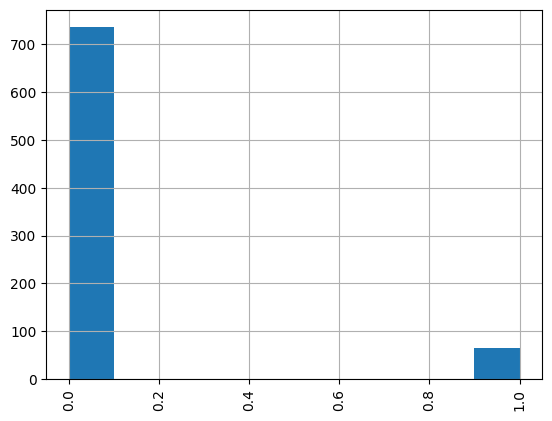

In [429]:
dataframe["Legendary"].hist()
plt.xticks(rotation=90)

In [430]:
import seaborn as sns
import numpy as np

In [431]:
dataframe.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,No Second Type,309,39,52,43,60,50,65,1,0


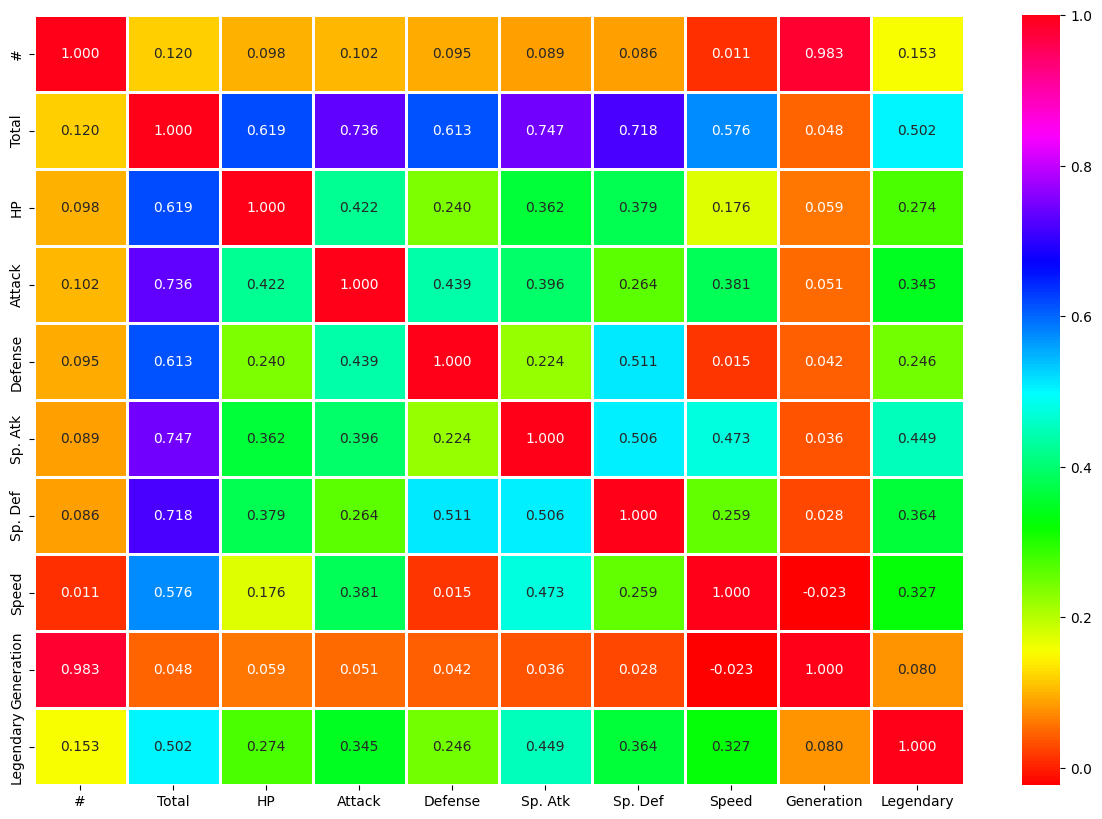

In [432]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Total', ylabel='Attack'>

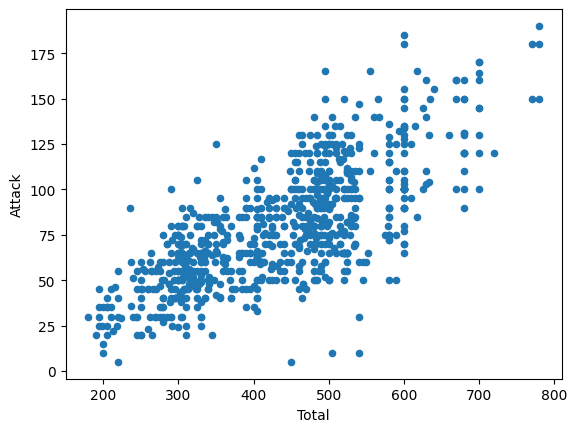

In [433]:
dataframe.plot.scatter(x="Total", y="Attack")

In [434]:
dataframe['Type 1'] = le.fit_transform(dataframe["Type 1"])
dataframe['Type 2'] = le.fit_transform(dataframe["Type 2"])
dataframe['Name'] = le.fit_transform(dataframe["Name"])

In [435]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [436]:
X = dataframe.drop(["Legendary"],axis=1)

In [437]:
X

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,80,9,14,318,45,49,49,65,65,45,1
1,2,329,9,14,405,60,62,63,80,80,60,1
2,3,745,9,14,525,80,82,83,100,100,80,1
3,3,746,9,14,625,80,100,123,122,120,80,1
4,4,102,6,12,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,160,15,4,600,50,100,150,100,150,50,6
796,719,161,15,4,700,50,160,110,160,110,110,6
797,720,314,14,8,600,80,110,60,150,130,70,6
798,720,315,14,1,680,80,160,60,170,130,80,6


In [438]:
Y=dataframe["Legendary"]

In [439]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Legendary, Length: 800, dtype: int64

In [440]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [441]:
naive_bayes_model = GaussianNB()

In [442]:
naive_bayes_model.fit(X_train, Y_train)

GaussianNB()

In [443]:
Y_predict = naive_bayes_model.predict(X_test)

In [444]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error

In [445]:
accuracy = accuracy_score(Y_test,Y_predict)
r2 = r2_score(Y_test,Y_predict)
mse = mean_squared_error(Y_test,Y_predict)
mae = mean_absolute_error(Y_test,Y_predict)

Со Гаусоновиот Наивен Баесов класификатор добиваме добра точност над тестирачкото множество, но имаме лош R2_score што може да значи дека нашиот модел добро ги класифицира податоците во False колоната. Бидејки тие се во многу поголем број од оние во True колоната, добиваме и добра точност над целото множество

In [446]:
print("Accuracy:",accuracy)
print("R2 score:",r2)
print("Mean squared error:",mse)
print("Mean absolute error:",mae)

Accuracy: 0.91875
R2 score: 0.04367816091954024
Mean squared error: 0.08125
Mean absolute error: 0.08125


In [447]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [448]:
LDA = LinearDiscriminantAnalysis()

In [449]:
LDA.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [450]:
Y_predict = LDA.predict(X_test)

In [451]:
accuracy = accuracy_score(Y_test,Y_predict)
r2 = r2_score(Y_test,Y_predict)
mse = mean_squared_error(Y_test,Y_predict)
mae = mean_absolute_error(Y_test,Y_predict)

In [452]:
print("Accuracy:",accuracy)
print("R2 score:",r2)
print("Mean squared error:",mse)
print("Mean absolute error:",mae)

Accuracy: 0.95625
R2 score: 0.4850574712643678
Mean squared error: 0.04375
Mean absolute error: 0.04375


In [453]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [454]:
QDA = QuadraticDiscriminantAnalysis()

In [455]:
QDA.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [456]:
Y_predict = QDA.predict(X_test)

In [457]:
accuracy = accuracy_score(Y_test,Y_predict)
r2 = r2_score(Y_test,Y_predict)
mse = mean_squared_error(Y_test,Y_predict)
mae = mean_absolute_error(Y_test,Y_predict)

Со LDA и QDA добиваме идентични резултати.Точноста на моделот е подобра од онаа на Гаусоновиот Наивен Баесов класификатор, исто како и R2_score.Од ова можеме да заклучиме дека овие два модели би биле посоодветни за користење во овој случај

In [458]:
print("Accuracy:",accuracy)
print("R2 score:",r2)
print("Mean squared error:",mse)
print("Mean absolute error:",mae)

Accuracy: 0.95625
R2 score: 0.4850574712643678
Mean squared error: 0.04375
Mean absolute error: 0.04375
